In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import csv
from datetime import datetime
import openpyxl as op

# Data import (labeled and unlabeled)

### Import labeled training and test data

In [2]:
corona_5g = pd.read_csv("~/Desktop/twitterAnalysis/FakeNews/dataset/graphs/5g_corona_conspiracy/feature_df_5g_corona_conspiracy.csv")
corona_5g['label'] = 'corona_5g'
corona_5g['conspiracy'] = '1'

non_conspiracy = pd.read_csv("~/Desktop/twitterAnalysis/FakeNews/dataset/graphs/non_conspiracy/feature_df_non_conspiracy.csv")
non_conspiracy['label'] = 'non_conspiracy'
non_conspiracy['conspiracy'] = '0'

other_conspiracy = pd.read_csv("~/Desktop/twitterAnalysis/FakeNews/dataset/graphs/other_conspiracy/feature_df_other_conspiracy.csv")
other_conspiracy['label'] = 'other_conspiracy'
other_conspiracy['conspiracy'] = '1'

all_data = corona_5g.append(non_conspiracy)
all_data = all_data.append(other_conspiracy)

all_data = all_data.dropna()

### Split into training and test sets

In [3]:
x_unprocessed = all_data[all_data.columns[0:18]]
x = StandardScaler().fit_transform(x_unprocessed)
y = all_data[all_data.columns[19]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

/Users/maria/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/maria/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Import unlabeled test data

In [4]:
official_test = pd.read_csv("/Users/maria/Desktop/twitterAnalysis/FakeNews/dataset/graphs/test_graphs/feature_df_test.csv")
official_test_complete = official_test.dropna()
official_test_complete_std = StandardScaler().fit_transform(official_test_complete)
print(official_test_complete_std)

[[-0.75699314 -0.15191231 -0.18961788 ...  0.23622521  0.25459924
  -0.32570066]
 [ 0.39549477 -0.27367263 -0.18961788 ... -0.40768454  0.00210232
  -0.32570066]
 [-0.87224193 -0.37752703  0.2869001  ... -0.2698612  -0.37664306
  -0.32570066]
 ...
 [-0.92986632 -0.42050127 -0.18961788 ... -0.36747824 -0.6607021
  -0.32570066]
 [ 1.02936311  0.0020787  -0.18961788 ... -0.23060602  1.07521423
  -0.32570066]
 [-1.1315517  -0.45631313 -1.6191718  ... -0.39944438 -0.69226421
  -0.32570066]]


/Users/maria/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/maria/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Model training

### Default decision tree - coarse classifier

In [5]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, y_pred)
labels = ['non-conspiracy', 'conspiracy']
acc = metrics.accuracy_score(y_test, y_pred)
mcc = metrics.matthews_corrcoef(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred, average='macro')
rec = metrics.recall_score(y_test, y_pred, average='macro')
print("Overall accuracy:" + str(acc), '\n')
print("MCC: " + str(mcc), '\n')
print("Precision: " + str(prec), '\n')
print("Recall: " + str(rec), '\n')
print(tabulate({"Label": labels,
               "Precision": precision,
               "Recall": recall,
               "F-score": fscore,
               "Support": support}, headers="keys"))
workbook = op.load_workbook("/Users/maria/Desktop/twitterAnalysis/FakeNews/scripts/graphs/model_summary.xlsx")
worksheet = workbook.worksheets[0]
row_n = worksheet.max_row+1
worksheet.cell(row=row_n, column=1).value = 'decision_tree_coarse_gini'
worksheet.cell(row=row_n, column=2).value = 'Decision Tree'
worksheet.cell(row=row_n, column=3).value = 'Structural Data'
worksheet.cell(row=row_n, column=4).value = 'Coarse ii'
worksheet.cell(row=row_n, column=5).value = mcc
worksheet.cell(row=row_n, column=6).value = acc
worksheet.cell(row=row_n, column=7).value = prec
worksheet.cell(row=row_n, column=8).value = rec
worksheet.cell(row=row_n, column=9).value = datetime.now()
workbook.save('/Users/maria/Desktop/twitterAnalysis/FakeNews/scripts/graphs/model_summary.xlsx')

Overall accuracy:0.6478260869565218 

MCC: 0.127407861691165 

Precision: 0.5634032634032634 

Recall: 0.5640060240963856 

Label             Precision    Recall    F-score    Support
--------------  -----------  --------  ---------  ---------
non-conspiracy     0.757576  0.753012   0.755287        332
conspiracy         0.369231  0.375      0.372093        128


In [6]:
official_test_complete['label'] = clf.predict(official_test_complete_std)
official_test_all = pd.concat([official_test, official_test_complete], axis=1)
labels = official_test_all['label']
labels.to_csv('decision_tree_coarse_gini.csv', header=False)

/Users/maria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Entropy (information gain) criterion  - coarse classifier

In [7]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, y_pred)
labels = ['non-conspiracy', 'conspiracy']
acc = metrics.accuracy_score(y_test, y_pred)
mcc = metrics.matthews_corrcoef(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred, average='macro')
rec = metrics.recall_score(y_test, y_pred, average='macro')
print("Overall accuracy:" + str(acc), '\n')
print("MCC: " + str(mcc), '\n')
print(tabulate({"Label": labels,
               "Precision": precision,
               "Recall": recall,
               "F-score": fscore,
               "Support": support}, headers="keys"))
workbook = op.load_workbook("/Users/maria/Desktop/twitterAnalysis/FakeNews/scripts/graphs/model_summary.xlsx")
worksheet = workbook.worksheets[0]
row_n = worksheet.max_row+1
worksheet.cell(row=row_n, column=1).value = 'decision_tree_coarse_entropy'
worksheet.cell(row=row_n, column=2).value = 'Decision Tree'
worksheet.cell(row=row_n, column=3).value = 'Structural Data'
worksheet.cell(row=row_n, column=4).value = 'Coarse ii'
worksheet.cell(row=row_n, column=5).value = mcc
worksheet.cell(row=row_n, column=6).value = acc
worksheet.cell(row=row_n, column=7).value = prec
worksheet.cell(row=row_n, column=8).value = rec
worksheet.cell(row=row_n, column=9).value = datetime.now()
workbook.save('/Users/maria/Desktop/twitterAnalysis/FakeNews/scripts/graphs/model_summary.xlsx')

Overall accuracy:0.6652173913043479 

MCC: 0.15846781989502048 

Label             Precision    Recall    F-score    Support
--------------  -----------  --------  ---------  ---------
non-conspiracy     0.764881  0.774096   0.769461        332
conspiracy         0.395161  0.382812   0.388889        128


In [8]:
official_test_complete['label'] = clf.predict(official_test_complete_std)
official_test_all = pd.concat([official_test, official_test_complete], axis=1)
labels = official_test_all['label']
labels.to_csv('decision_tree_coarse_entropy.csv', header=False)

/Users/maria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Gini criterion with max depth  - coarse classifier

In [9]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, y_pred)
labels = ['non-conspiracy', 'conspiracy']
acc = metrics.accuracy_score(y_test, y_pred)
mcc = metrics.matthews_corrcoef(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred, average='macro')
rec = metrics.recall_score(y_test, y_pred, average='macro')
print("Overall accuracy:" + str(acc), '\n')
print("MCC: " + str(mcc), '\n')
print(tabulate({"Label": labels,
               "Precision": precision,
               "Recall": recall,
               "F-score": fscore,
               "Support": support}, headers="keys"))
workbook = op.load_workbook("/Users/maria/Desktop/twitterAnalysis/FakeNews/scripts/graphs/model_summary.xlsx")
worksheet = workbook.worksheets[0]
row_n = worksheet.max_row+1
worksheet.cell(row=row_n, column=1).value = 'decision_tree_coarse_gini_max_depth'
worksheet.cell(row=row_n, column=2).value = 'Decision Tree'
worksheet.cell(row=row_n, column=3).value = 'Structural Data'
worksheet.cell(row=row_n, column=4).value = 'Coarse ii'
worksheet.cell(row=row_n, column=5).value = mcc
worksheet.cell(row=row_n, column=6).value = acc
worksheet.cell(row=row_n, column=7).value = prec
worksheet.cell(row=row_n, column=8).value = rec
worksheet.cell(row=row_n, column=9).value = datetime.now()
workbook.save('/Users/maria/Desktop/twitterAnalysis/FakeNews/scripts/graphs/model_summary.xlsx')

Overall accuracy:0.7130434782608696 

MCC: 0.15871624483878202 

Label             Precision    Recall    F-score    Support
--------------  -----------  --------  ---------  ---------
non-conspiracy     0.748756  0.906627   0.820163        332
conspiracy         0.465517  0.210938   0.290323        128


In [10]:
official_test_complete['label'] = clf.predict(official_test_complete_std)
official_test_all = pd.concat([official_test, official_test_complete], axis=1)
labels = official_test_all['label']
labels.to_csv('decision_tree_coarse_gini_max_depth.csv', header=False)

/Users/maria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Entropy (information gain) criterion with max depth  - coarse classifier

In [11]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, y_pred)
labels = ['non-conspiracy', 'conspiracy']
acc = metrics.accuracy_score(y_test, y_pred)
mcc = metrics.matthews_corrcoef(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred, average='macro')
rec = metrics.recall_score(y_test, y_pred, average='macro')
print("Overall accuracy:" + str(acc), '\n')
print("MCC: " + str(mcc), '\n')
print(tabulate({"Label": labels,
               "Precision": precision,
               "Recall": recall,
               "F-score": fscore,
               "Support": support}, headers="keys"))
workbook = op.load_workbook("/Users/maria/Desktop/twitterAnalysis/FakeNews/scripts/graphs/model_summary.xlsx")
worksheet = workbook.worksheets[0]
row_n = worksheet.max_row+1
worksheet.cell(row=row_n, column=1).value = 'decision_tree_coarse_entropy_max_depth'
worksheet.cell(row=row_n, column=2).value = 'Decision Tree'
worksheet.cell(row=row_n, column=3).value = 'Structural Data'
worksheet.cell(row=row_n, column=4).value = 'Coarse ii'
worksheet.cell(row=row_n, column=5).value = mcc
worksheet.cell(row=row_n, column=6).value = acc
worksheet.cell(row=row_n, column=7).value = prec
worksheet.cell(row=row_n, column=8).value = rec
worksheet.cell(row=row_n, column=9).value = datetime.now()
workbook.save('/Users/maria/Desktop/twitterAnalysis/FakeNews/scripts/graphs/model_summary.xlsx')

Overall accuracy:0.7152173913043478 

MCC: 0.17594202569327108 

Label             Precision    Recall    F-score    Support
--------------  -----------  --------  ---------  ---------
non-conspiracy     0.753149  0.900602   0.820302        332
conspiracy         0.47619   0.234375   0.314136        128


In [12]:
official_test_complete['label'] = clf.predict(official_test_complete_std)
official_test_all = pd.concat([official_test, official_test_complete], axis=1)
labels = official_test_all['label']
labels.to_csv('decision_tree_coarse_entropy_max_depth.csv', header=False)

/Users/maria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Extra Features

### Visualize decision tree

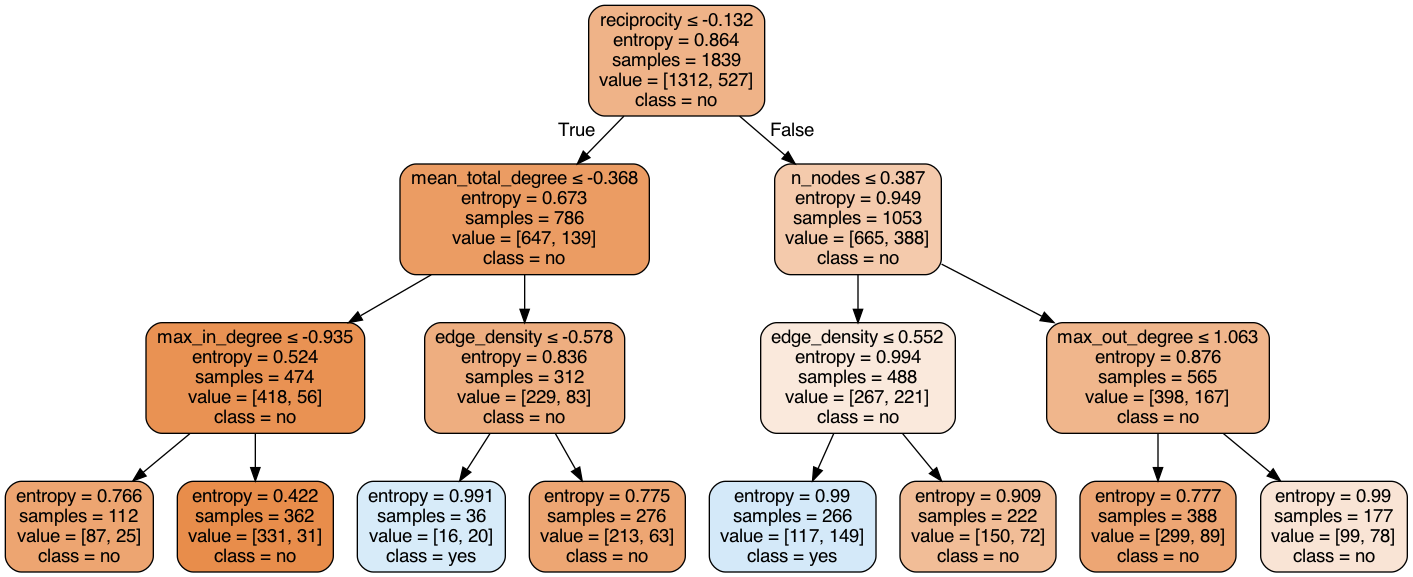

In [13]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
feature_cols = list(x_unprocessed.columns.values)
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['no', 'yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

### Feature importance

In [14]:
feat_importance = clf.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)
feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head()

,FeatureImportance
reciprocity,0.378691
edge_density,0.194280
n_nodes,0.125965
mean_total_degree,0.125024
max_out_degree,0.113916


In [15]:
# Sources

# https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# https://towardsdatascience.com/decision-tree-algorithm-for-multiclass-problems-using-python-6b0ec1183bf5
